In [1]:
%matplotlib inline

import numpy as np
from scipy import signal, ndimage, interpolate

import matplotlib.pyplot as plt
import seaborn as sns
font = {'family' : 'sans-serif',
        'size'   : 20}

plt.rc('font', **font)

from pathlib import Path
import os,sys
import h5py, json
import sys 

In [2]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''

    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

In [3]:
animal = 'Li'
task = 'T3g'
date = '062718'
fn = '{}_{}_{}_Results'.format(animal,task,date)
dataPath = Path('/scratch/users/alexg8/Data/{}/{}'.format(animal,fn))

TT_Dirs =[]
nTT = 16
for tt in np.arange(1,nTT+1):
    if (dataPath/('tt_{}'.format(tt))).exists():
        TT_Dirs.append((dataPath/('tt_{}'.format(tt))))

In [240]:
list(TT_Dirs)

[PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_1'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_2'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_3'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_4'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_5'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_6'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_7'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_8'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_10'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_11'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_12'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_13'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Resu

In [4]:
list(TT_Dirs[8].glob('*'))

[PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/template_feature_ind.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/similar_templates.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/channel_map.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/pc_features.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/params.py'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/spike_templates.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/spike_clusters.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/templates_ind.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/rez.mat'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/whitening_mat.npy'),
 PosixPath('/scratch/users/alexg8/Data/Li/Li_T3g_062718_Results/tt_9/channel_positions.npy'),
 PosixPath('/s

In [5]:
tt=8
st=np.load(TT_Dirs[tt]/'spike_times.npy')
sc=np.load(TT_Dirs[tt]/'spike_clusters.npy')
sa=np.load(TT_Dirs[tt]/'amplitudes.npy')
s_temp = np.load(TT_Dirs[tt]/'spike_templates.npy')
temp =np.load(TT_Dirs[tt]/'templates.npy')
temp_feat =np.load(TT_Dirs[tt]/'template_features.npy')
pc_feat =np.load(TT_Dirs[tt]/'pc_features.npy')
pc_ind = np.load(TT_Dirs[tt]/'pc_feature_ind.npy')
with open(str(TT_Dirs[tt].parent/('header_tt{}.json').format(tt)), 'r') as f:
    head = json.load(f)

[16 11 14 12  4  1 15 13 10  9  8  7  6  5  3  2]
[182728  65720  46355  43533  17088   4464      0      0      0      0
      0      0      0      0      0      0]


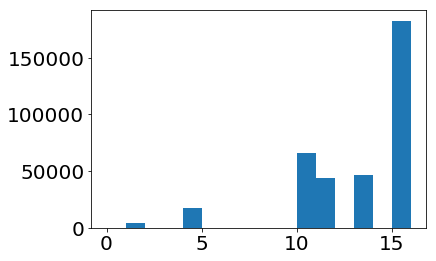

In [6]:
counts,bins=np.histogram(sc,16)
i=np.argsort(counts)[::-1]
print(i+1)
print(counts[i])
plt.hist(sc,np.arange(0,17,1.0001))
nSamps=head['nSamps']

[15 10 13 11  3  0 14 12  9  8  7  6  5  4  2  1] [182728  65720  46355  43533  17088   4464      0      0      0      0
      0      0      0      0      0      0]


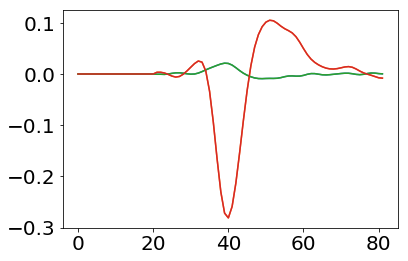

In [7]:
te=3
plt.plot(temp[te,:,:])
print(i,counts[i])

In [63]:
fs=32000
BinSize=64
# calculate the number of bins of size BinSize within the experimental time window
nBins = int(nSamps / BinSize)

x = np.zeros(nBins)
spike_time_ids = st[sc==te+1]
x[np.floor(spike_time_ids/BinSize).astype('int')] = 1.

array([0])

/home/users/alexg8/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


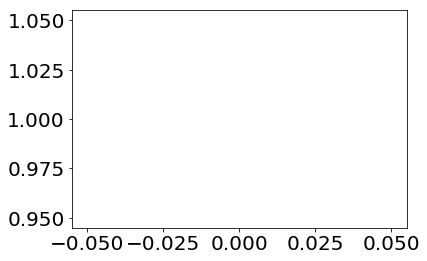

In [64]:
ac=autocorr1(x,np.arange(0,100))
plt.plot(ac)

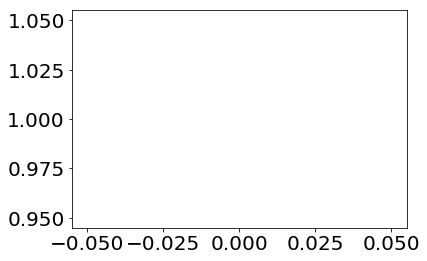